In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### LOADING PACKAGES AND DATA

In [4]:
df=pd.read_csv(r'file:///C:\Users\SHAKIR\OneDrive\Desktop\DATASET\Train.csv')

In [5]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### DATA STRUCTURE AND CONTENT

In [7]:
df.shape

(8523, 12)

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

### EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

### univariate analysis

In [16]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [18]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [19]:
Outlet_establish_year = df.groupby('Outlet_Identifier')['Outlet_Establishment_Year'].first()
Outlet_establish_year

Outlet_Identifier
OUT010    1998
OUT013    1987
OUT017    2007
OUT018    2009
OUT019    1985
OUT027    1985
OUT035    2004
OUT045    2002
OUT046    1997
OUT049    1999
Name: Outlet_Establishment_Year, dtype: int64

In [20]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
outlet_size = df.groupby('Outlet_Identifier')['Outlet_Size'].first()
outlet_size

Outlet_Identifier
OUT010      None
OUT013      High
OUT017      None
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045      None
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

In [22]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [23]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [24]:
outlet_location_type = df.groupby('Outlet_Identifier')['Outlet_Location_Type'].first()
outlet_location_type

Outlet_Identifier
OUT010    Tier 3
OUT013    Tier 3
OUT017    Tier 2
OUT018    Tier 3
OUT019    Tier 1
OUT027    Tier 3
OUT035    Tier 2
OUT045    Tier 2
OUT046    Tier 1
OUT049    Tier 1
Name: Outlet_Location_Type, dtype: object

In [25]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [26]:
outlet_type = df.groupby('Outlet_Identifier')['Outlet_Type'].first()
outlet_type

Outlet_Identifier
OUT010        Grocery Store
OUT013    Supermarket Type1
OUT017    Supermarket Type1
OUT018    Supermarket Type2
OUT019        Grocery Store
OUT027    Supermarket Type3
OUT035    Supermarket Type1
OUT045    Supermarket Type1
OUT046    Supermarket Type1
OUT049    Supermarket Type1
Name: Outlet_Type, dtype: object

In [27]:
df.Item_Identifier.value_counts().head(20)

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
Name: Item_Identifier, dtype: int64

<AxesSubplot:>

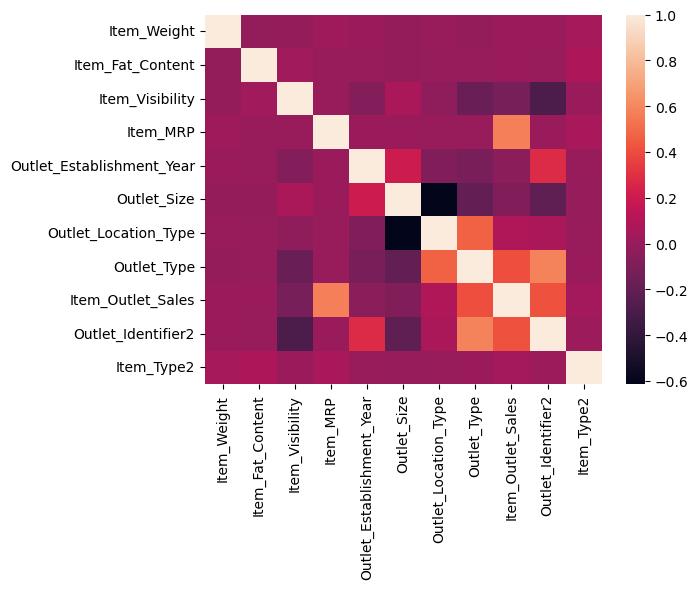

In [100]:
#plotting the correlation matrix
sns.heatmap(df.corr() ,cmap='rocket')

In [28]:
#BIVARIATE ANALYSIS

In [29]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Outlet_Identifier
OUT010    188340.17
OUT013   2142663.58
OUT017   2167465.29
OUT018   1851822.83
OUT019    179694.09
OUT027   3453926.05
OUT035   2268122.94
OUT045   2036725.48
OUT046   2118395.17
OUT049   2183969.81
Name: Item_Outlet_Sales, dtype: float64


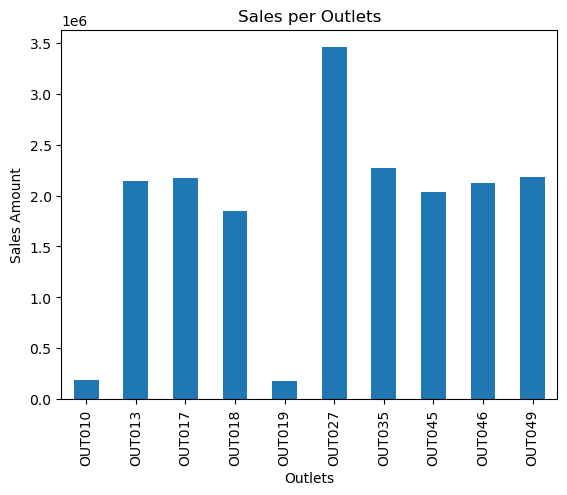

In [30]:
pd.options.display.float_format = '{:.2f}'.format
outlet_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
print(outlet_sales)
ax = outlet_sales.plot(kind='bar',title='Sales per Outlets')
ax.set_xlabel('Outlets')
ax.set_ylabel('Sales Amount')
plt.show()

Item_Type
Baking Goods            1265525.34
Breads                   553237.19
Breakfast                232298.95
Canned                  1444151.49
Dairy                   1522594.05
Frozen Foods            1825734.79
Fruits and Vegetables   2820059.82
Hard Drinks              457793.43
Health and Hygiene      1045200.14
Household               2055493.71
Meat                     917565.61
Others                   325517.61
Seafood                  148868.22
Snack Foods             2732786.09
Soft Drinks              892897.72
Starchy Foods            351401.25
Name: Item_Outlet_Sales, dtype: float64


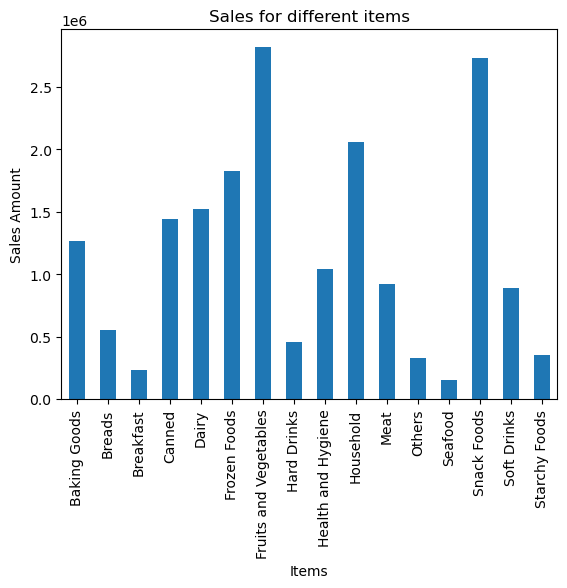

In [31]:
Item_Type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
print(Item_Type)
bx = Item_Type.plot(kind='bar',title='Sales for different items')
bx.set_xlabel('Items')
bx.set_ylabel('Sales Amount')
plt.show()

In [33]:
categorical_data = df.select_dtypes(include=[object])
print("count of categorical features in the dataset: ",categorical_data.shape[1])
numerical_data = df.select_dtypes(include=[np.float64,np.int64])
print("count of numerical features in the dataset: ",numerical_data.shape[1])

count of categorical features in the dataset:  7
count of numerical features in the dataset:  5


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

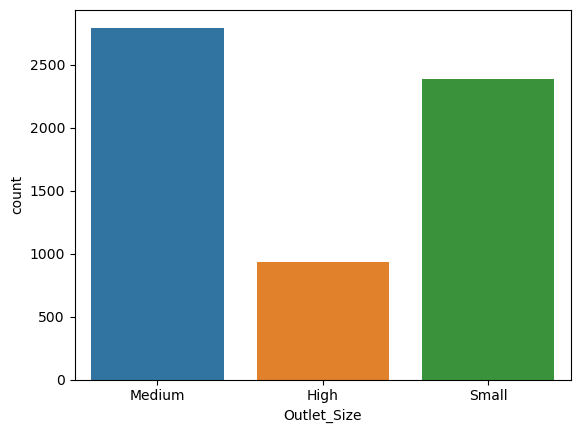

In [34]:
sns.countplot(x='Outlet_Size', data=categorical_data)

<AxesSubplot:xlabel='count', ylabel='Outlet_Identifier'>

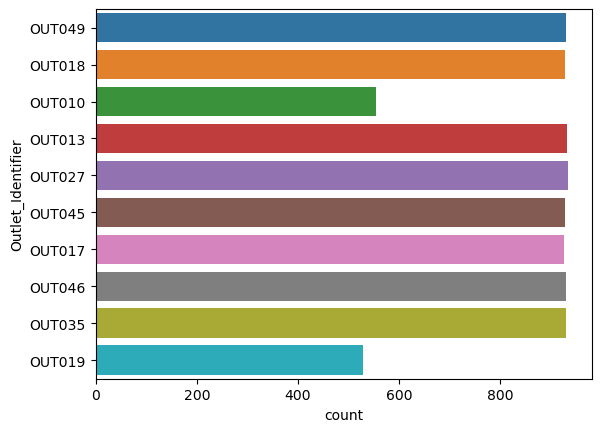

In [35]:
sns.countplot(y='Outlet_Identifier', data = categorical_data)

<AxesSubplot:>

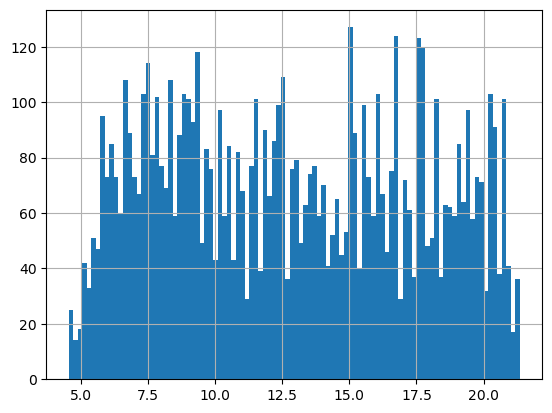

In [36]:
numerical_data['Item_Weight'].hist(bins=100)

<AxesSubplot:>

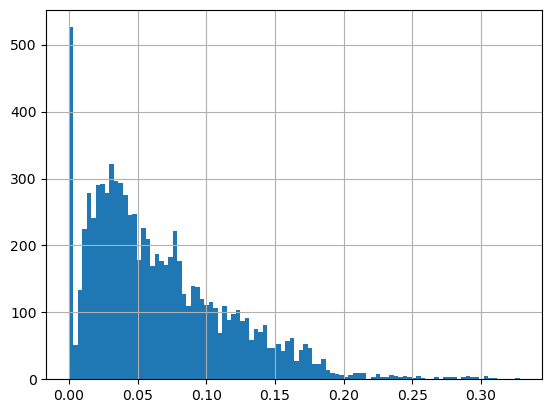

In [37]:
numerical_data['Item_Visibility'].hist(bins=100)

<AxesSubplot:>

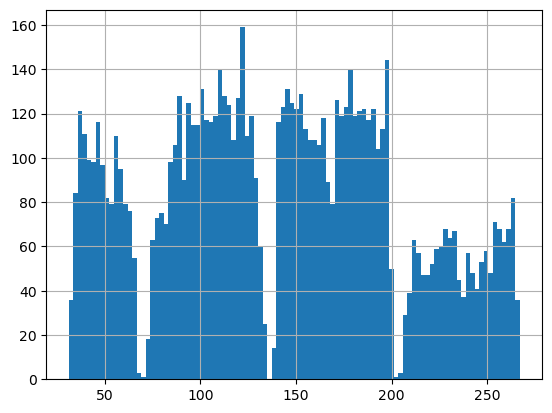

In [38]:
numerical_data['Item_MRP'].hist(bins=100)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

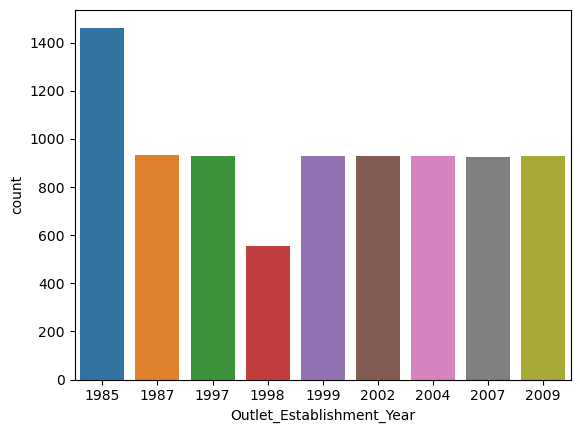

In [39]:
sns.countplot(x='Outlet_Establishment_Year', data=numerical_data)                                             

Outlet_Type
Grocery Store         368034.27
Supermarket Type1   12917342.26
Supermarket Type2    1851822.83
Supermarket Type3    3453926.05
Name: Item_Outlet_Sales, dtype: float64


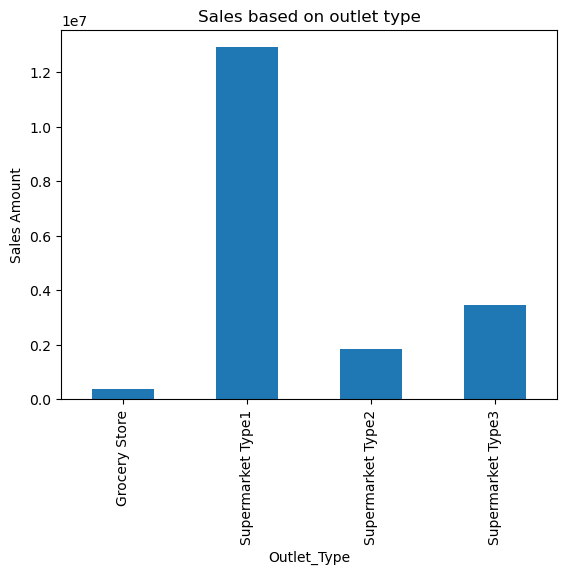

In [40]:
Outlet_Type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
print(Outlet_Type)
cx = Outlet_Type.plot(kind='bar',title='Sales based on outlet type')
cx.set_xlabel('Outlet_Type')
cx.set_ylabel('Sales Amount')
plt.show()

In [41]:
# MULTIVARIATE ANALYSIS

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

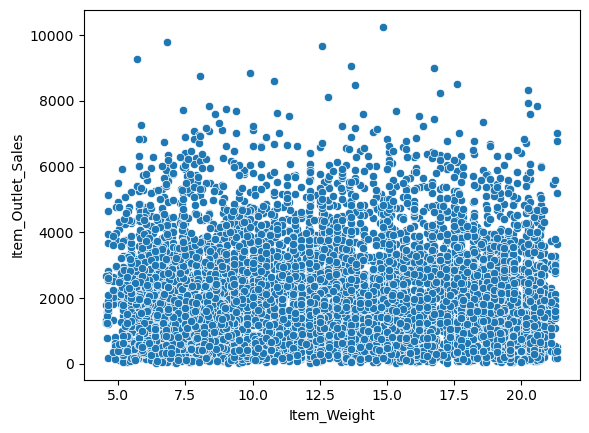

In [42]:
#checking for any pattern or relationship between item weight and outlet sales
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

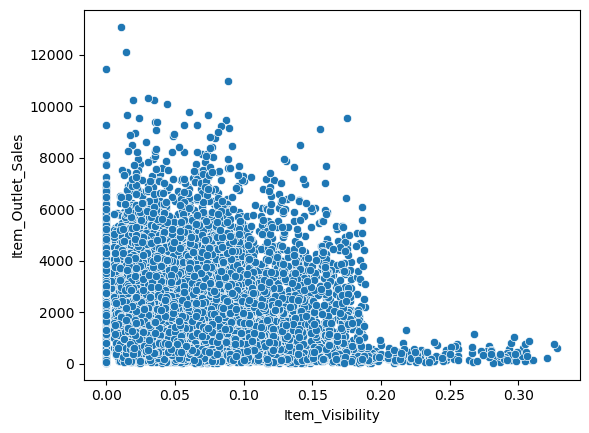

In [43]:
# checking for any pattern or  relationship between product visibility and outlet sales
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

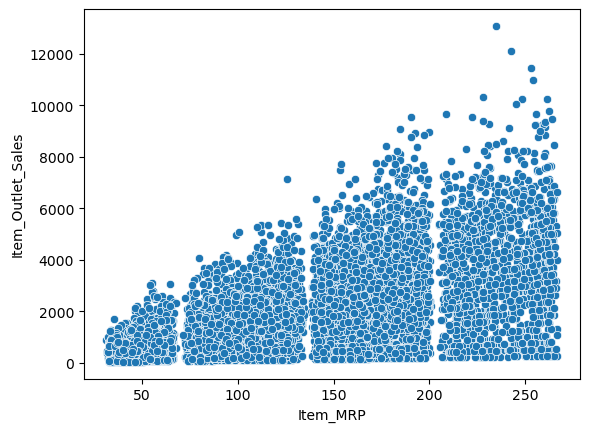

In [44]:
# checking for any relationship between price of the product and the outlet sales
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

In [45]:
#MISSING VALUE TREATMENT

In [46]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

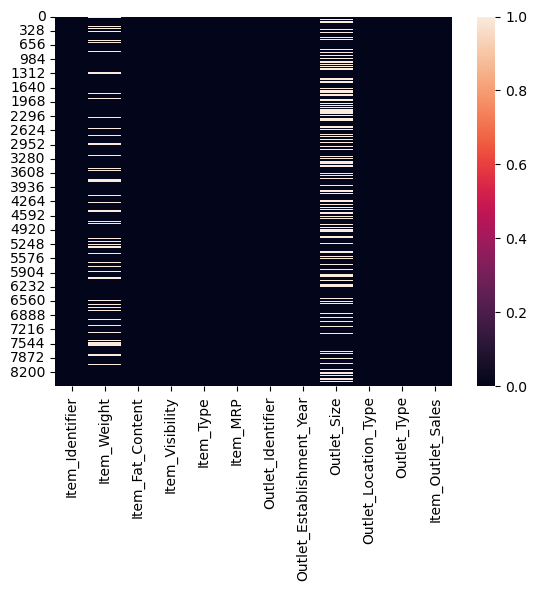

In [47]:
sns.heatmap(df.isnull())

In [48]:
df.isnull().sum()*100/len(df)

Item_Identifier              0.00
Item_Weight                 17.17
Item_Fat_Content             0.00
Item_Visibility              0.00
Item_Type                    0.00
Item_MRP                     0.00
Outlet_Identifier            0.00
Outlet_Establishment_Year    0.00
Outlet_Size                 28.28
Outlet_Location_Type         0.00
Outlet_Type                  0.00
Item_Outlet_Sales            0.00
dtype: float64

Text(0.5, 1.0, 'Item_Weight Boxplot')

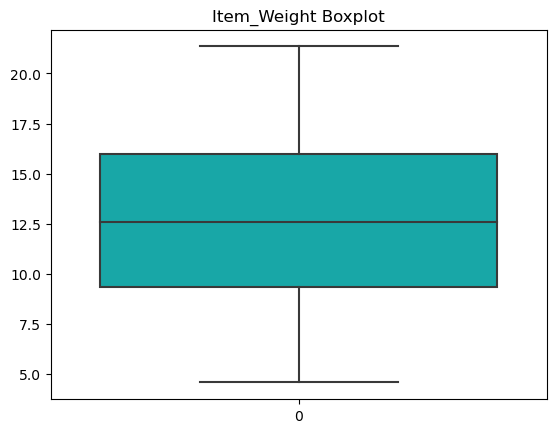

In [93]:
sns.boxplot(data=df['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

In [49]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)

In [50]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [51]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [52]:
#FEATURE ENGINEERING

In [53]:
#performing Label encoding for the ordered categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Item_Fat_Content'])
df.Item_Fat_Content=le.transform(df['Item_Fat_Content'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,2,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,1,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,2,0.00,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,1,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [54]:
le.fit(df['Outlet_Size'])
df.Outlet_Size=le.transform(df['Outlet_Size'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.02,Dairy,249.81,OUT049,1999,1,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,2,0.02,Soft Drinks,48.27,OUT018,2009,1,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,1,0.02,Meat,141.62,OUT049,1999,1,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,2,0.00,Fruits and Vegetables,182.09,OUT010,1998,1,Tier 3,Grocery Store,732.38
4,NCD19,8.93,1,0.00,Household,53.86,OUT013,1987,0,Tier 3,Supermarket Type1,994.71


In [55]:
le.fit(df['Outlet_Location_Type'])
df.Outlet_Location_Type=le.transform(df['Outlet_Location_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.02,Dairy,249.81,OUT049,1999,1,0,Supermarket Type1,3735.14
1,DRC01,5.92,2,0.02,Soft Drinks,48.27,OUT018,2009,1,2,Supermarket Type2,443.42
2,FDN15,17.50,1,0.02,Meat,141.62,OUT049,1999,1,0,Supermarket Type1,2097.27
3,FDX07,19.20,2,0.00,Fruits and Vegetables,182.09,OUT010,1998,1,2,Grocery Store,732.38
4,NCD19,8.93,1,0.00,Household,53.86,OUT013,1987,0,2,Supermarket Type1,994.71


In [56]:
le=LabelEncoder()
le.fit(df['Outlet_Type'])
df.Outlet_Type=le.transform(df['Outlet_Type'])
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.02,Dairy,249.81,OUT049,1999,1,0,1,3735.14
1,DRC01,5.92,2,0.02,Soft Drinks,48.27,OUT018,2009,1,2,2,443.42
2,FDN15,17.50,1,0.02,Meat,141.62,OUT049,1999,1,0,1,2097.27
3,FDX07,19.20,2,0.00,Fruits and Vegetables,182.09,OUT010,1998,1,2,0,732.38
4,NCD19,8.93,1,0.00,Household,53.86,OUT013,1987,0,2,1,994.71
5,FDP36,10.39,2,0.00,Baking Goods,51.40,OUT018,2009,1,2,2,556.61
6,FDO10,13.65,2,0.01,Snack Foods,57.66,OUT013,1987,0,2,1,343.55
7,FDP10,12.60,1,0.13,Snack Foods,107.76,OUT027,1985,1,2,3,4022.76
8,FDH17,16.20,2,0.02,Frozen Foods,96.97,OUT045,2002,1,1,1,1076.60
9,FDU28,19.20,2,0.09,Frozen Foods,187.82,OUT017,2007,1,1,1,4710.53


PERFORMING FREQUENCY ENCODING FOR NOMINAL CATEGORICAL VARIABLE HAVING MORE UNIQUE VARIABLES

Taking the count of each variable and mapping variable with the count respectively

In [58]:
# Frequency Encoding for column 'Outlet_Identifier'
frequency_map = df['Outlet_Identifier'].value_counts().to_dict()
df['Outlet_Identifier2'] = df['Outlet_Identifier'].map(frequency_map)


In [59]:
# Frequency Encoding for column 'Item_Type'
frequency_map = df['Item_Type'].value_counts().to_dict()
df['Item_Type2'] = df['Item_Type'].map(frequency_map)

In [60]:
# Droping the categorical column from the dataframe
df.drop(['Item_Identifier','Item_Type','Outlet_Identifier'],axis=1,inplace=True)

In [61]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Identifier2', 'Item_Type2'],
      dtype='object')

### Checking for any null values or duplicates after the data processing

In [63]:
df.isnull().sum()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Identifier2           0
Item_Type2                   0
dtype: int64

In [64]:
df.duplicated().sum()

0

splitting the data into input Features and Target variables 

In [65]:
x = df.drop(['Item_Outlet_Sales'],axis=1)

In [66]:
y = df['Item_Outlet_Sales']

### TRAIN TEST SPLIT 

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

DEVELOPING A LINEAR REGRESSION MODEL

In [68]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
lr.score(x_train,y_train)

0.5445072511408207

In [70]:
y_pred = lr.predict(x_test)

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Linear_Regression_mse = mean_squared_error(y_test,y_pred)
lr_r2 = r2_score(y_test,y_pred)

print('Linear Regression MSE : ',Linear_Regression_mse)
print('Linear Regression r2 Score : ',lr_r2)

Linear Regression MSE :  1309585.5798517577
Linear Regression r2 Score :  0.5525628746609945


### DEVELOPING A REGULARIZED REGRESSION MODEL

In [72]:
from sklearn.linear_model import Ridge,Lasso

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.5)

In [73]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [74]:
ridge_predictions = ridge_model.predict(x_test)
lasso_predictions = lasso_model.predict(x_test)

ridge_mse = mean_squared_error(y_test,ridge_predictions)
lasso_mse = mean_squared_error(y_test,lasso_predictions)

ridge_r2 = r2_score(y_test,ridge_predictions)
lasso_r2 = r2_score(y_test,lasso_predictions)

print('Ridge Regression MSE : ',ridge_mse)
print('Ridge Regression r2 Score : ',ridge_r2)

print('Lasso Regression MSE : ',lasso_mse)
print('Lasso Regression r2 Score : ',lasso_r2)

Ridge Regression MSE :  1309574.0355886163
Ridge Regression r2 Score :  0.552566818910224
Lasso Regression MSE :  1309547.7990633226
Lasso Regression r2 Score :  0.5525757829639192


### DEVELOPING A RANDOMFOREST REGRESSION MODEL

In [75]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [76]:
rf_model.score(x_train,y_train)

0.937627943528456

In [77]:
rf_predictions = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test,rf_predictions)
rf_r2 = r2_score(y_test,rf_predictions)

print('Random Forest Regressor MSE : ',rf_mse)
print('Random Forest Regressor r2 Score : ',rf_r2)

Random Forest Regressor MSE :  1317228.8262905562
Random Forest Regressor r2 Score :  0.549951459059411


## SUMMARY

In [85]:
data = {'Model': ['Linear Regression', 'Ridge-Regularized Linear Regression','Lasso-Regularized Linear Regression', 'Random Forest'],
        'MSE': [Linear_Regression_mse, ridge_mse, lasso_mse,rf_mse],
        'r2_Score': [lr_r2, ridge_r2,lasso_r2,rf_r2]}
result = pd.DataFrame(data)

In [86]:
result

,Model,MSE,r2_Score
0,Linear Regression,1309585.58,0.55
1,Ridge-Regularized Linear Regression,1309574.04,0.55
2,Lasso-Regularized Linear Regression,1309547.80,0.55
3,Random Forest,1317228.83,0.55
